In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import plotly.express as px

In [6]:
a_to_z = pd.read_csv("../data/A_to_Z_Flowers_cleaned.csv")
growth_hydroponic = pd.read_csv("../data/Plant_growth-Hydroponic_and_Soil_Compound_Dataset.csv")
plant_growth = pd.read_csv("../data/plant_growth_data.csv")
plant_health = pd.read_csv("../data/plant_health_data.csv")
plant_moniter = pd.read_csv("../data/plant_moniter_health_data.csv")

In [ ]:
#nom des colonnes de plante_health_data
columns = ["Soil_Moisture",	"Ambient_Temperature", "Soil_Temperature", "Humidity", "Light_Intensity", "Soil_pH", "Nitrogen_Level", "Phosphorus_Level", "Potassium_Level", "Chlorophyll_Content", "Electrochemical_Signal"]

In [ ]:
health_counts = plant_health["Plant_Health_Status"].value_counts()

print(health_counts)

Plant_Health_Status
High Stress        500
Moderate Stress    401
Healthy            299
Name: count, dtype: int64


In [9]:
stats = plant_health[columns].describe().T

stats["median"] = plant_health[columns].median()

print(stats)

                         count        mean         std         min  \
Soil_Moisture           1200.0   25.106918    8.677725   10.000724   
Ambient_Temperature     1200.0   23.999130    3.441561   18.001993   
Soil_Temperature        1200.0   19.957794    2.932073   15.003710   
Humidity                1200.0   54.853165    8.784916   40.028758   
Light_Intensity         1200.0  612.637265  228.318853  200.615482   
Soil_pH                 1200.0    6.524102    0.581755    5.507392   
Nitrogen_Level          1200.0   30.106751   11.514396   10.003650   
Phosphorus_Level        1200.0   30.264484   11.466846   10.017690   
Potassium_Level         1200.0   30.112088   11.668085   10.000606   
Chlorophyll_Content     1200.0   34.749591    8.766995   20.025511   
Electrochemical_Signal  1200.0    0.987764    0.575116    0.002376   

                               25%         50%         75%         max  \
Soil_Moisture            17.131893   25.168333   32.370231   39.993164   
Ambient_Tem

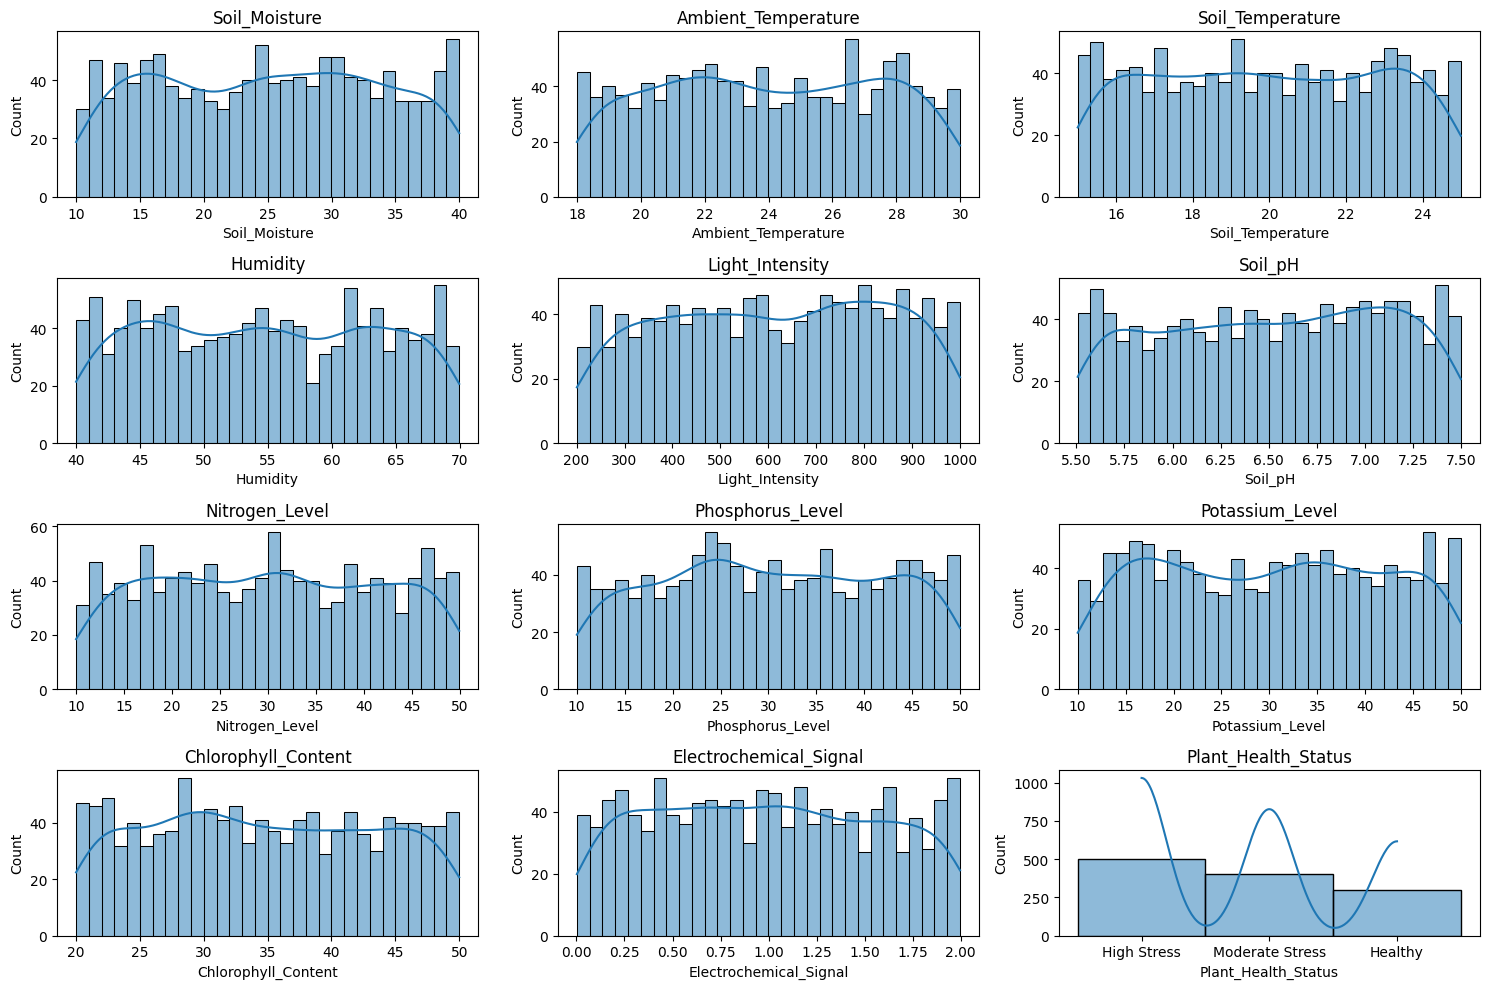

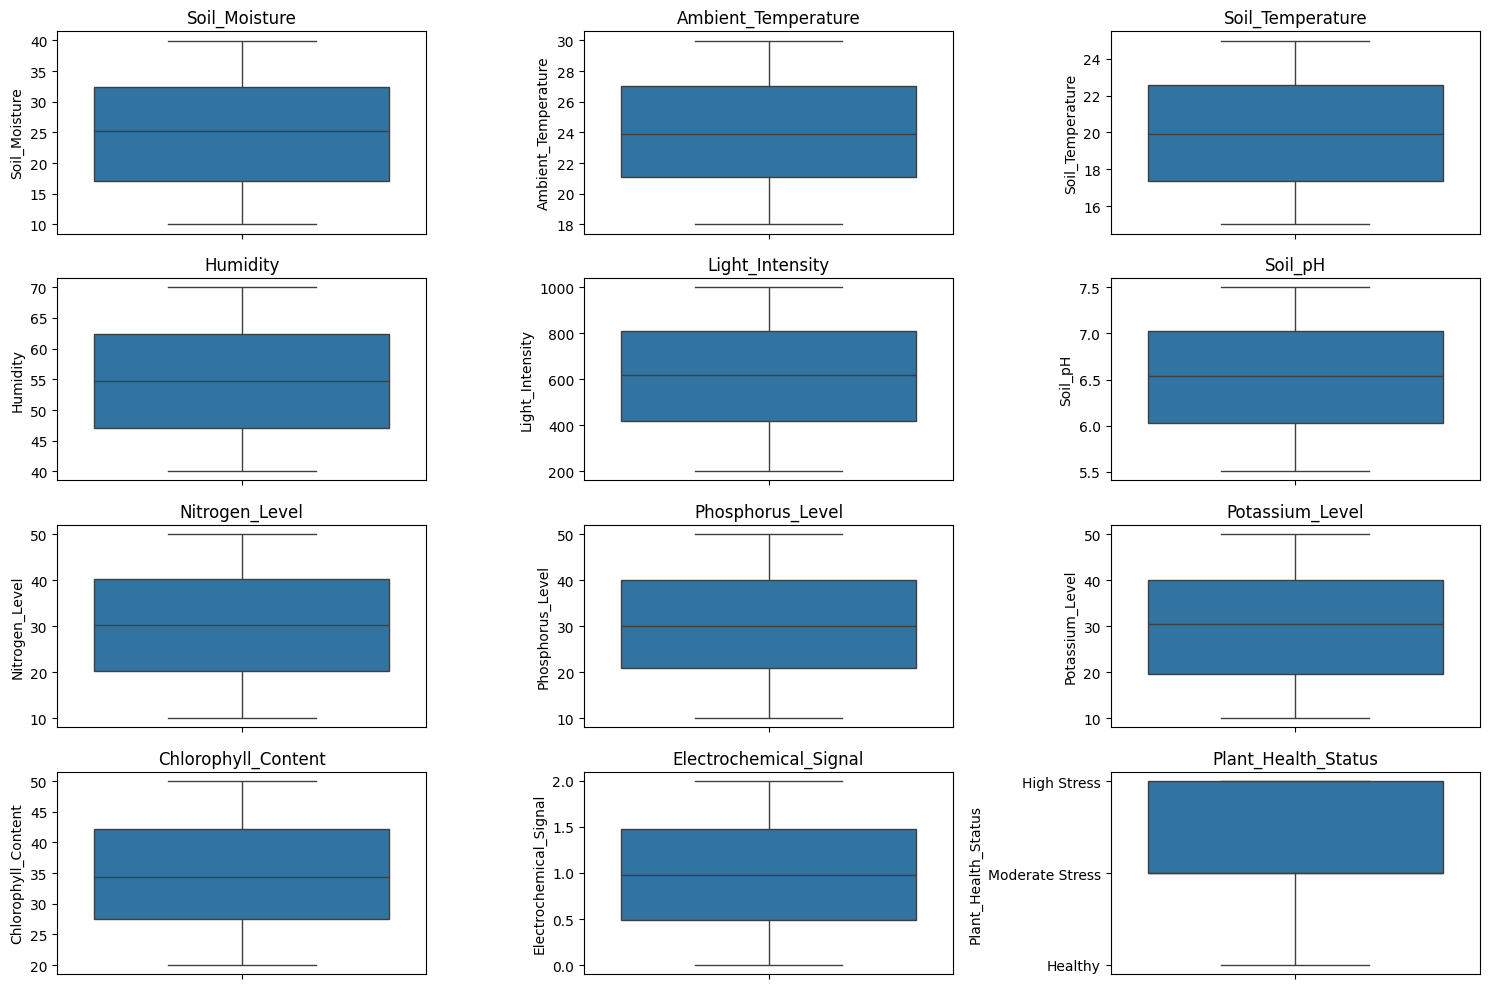

In [ ]:
#distributions des variables du fichier plant_health_data
plant_health.set_index(["Timestamp", "Plant_ID"], inplace=True)

# Afficher les distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(plant_health.columns):
    plt.subplot(4, 3, i + 1)  # Adapter le nombre de lignes/colonnes
    sns.histplot(plant_health[col].dropna(), kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

# Boxplots pour voir la distribution et les outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(plant_health.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=plant_health[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [12]:
plant_counts = a_to_z["PlantType"].value_counts().reset_index()
plant_counts.columns = ["PlantType", "Count"]

plant_counts["Short_PlantType"] = plant_counts["PlantType"].apply(lambda x: " ".join(x.split()[:2]))

fig = px.bar(
    plant_counts, 
    x="Short_PlantType",
    y="Count", 
    text="Count", 
    title="Nombre de Plantes par Type de Plante",
    labels={"Short_PlantType": "Type de Plante", "Count": "Nombre de Plantes"},
    hover_name="PlantType",
    color="Count",
    color_continuous_scale="viridis"
)

fig.update_traces(
    textposition="outside",
    hovertemplate="<b>%{hovertext}</b><br>Nombre de Plantes: %{y}"
)

fig.show()

In [13]:
plant_counts = a_to_z["BloomsIn"].value_counts().reset_index()
plant_counts.columns = ["BloomsIn", "Count"]

plant_counts["Short_BloomsIn"] = plant_counts["BloomsIn"].apply(lambda x: " ".join(x.split()[:2]))

fig = px.bar(
    plant_counts, 
    x="Short_BloomsIn",
    y="Count", 
    text="Count", 
    title="Nombre de Plantes par Saisons",
    labels={"Short_BloomsIn": "saison", "Count": "Nombre de Plantes"},
    hover_name="BloomsIn",
    color="Count",
    color_continuous_scale="viridis"
)

fig.update_traces(
    textposition="outside",
    hovertemplate="<b>%{hovertext}</b><br>Nombre de Plantes: %{y}"
)

fig.show()

In [14]:
saisons = ["Spring", "Summer", "Autumn", "Winter"]

seasonal_plants = []

a_to_z["BloomsIn"] = a_to_z["BloomsIn"].astype(str)
a_to_z["BloomsIn"] = a_to_z["BloomsIn"].apply(lambda x: [saison for saison in saisons if saison in x])

for _, row in a_to_z.iterrows():
    for saison in row["BloomsIn"]:
        seasonal_plants.append({"Name": row["Name"], "Season": saison})

seasonal_df = pd.DataFrame(seasonal_plants)

season_counts = seasonal_df["Season"].value_counts().reset_index()
season_counts.columns = ["Season", "Total Plants"]

exclusive_plants = seasonal_df.groupby("Name").filter(lambda x: len(x) == 1)
exclusive_counts = exclusive_plants["Season"].value_counts().reset_index()
exclusive_counts.columns = ["Season", "Exclusive Plants"]

final_counts = season_counts.merge(exclusive_counts, on="Season", how="left").fillna(0)

final_counts["Shared Plants"] = final_counts["Total Plants"] - final_counts["Exclusive Plants"]

fig = px.bar(
    final_counts.melt(id_vars="Season", var_name="Type", value_name="Count"), 
    x="Season", 
    y="Count", 
    color="Type",
    title="Répartition des Plantes par Saison",
    labels={"Season": "Saison", "Count": "Nombre de Plantes"},
    barmode="group",
    text="Count"
)

fig.update_traces(textposition="outside")

fig.show()

In [15]:
plant_counts = a_to_z["SunNeeds"].value_counts().reset_index()
plant_counts.columns = ["SunNeeds", "Count"]

plant_counts["Short_SunNeeds"] = plant_counts["SunNeeds"].apply(lambda x: " ".join(x.split()[:2]))

fig = px.bar(
    plant_counts, 
    x="Short_SunNeeds",
    y="Count", 
    text="Count", 
    title="Nombre de Plantes par besoin en exposition soleil",
    labels={"Short_SunNeeds": "expo soleil", "Count": "Nombre de Plantes"},
    hover_name="SunNeeds",
    color="Count",
    color_continuous_scale="viridis"
)

fig.update_traces(
    textposition="outside",
    hovertemplate="<b>%{hovertext}</b><br>Nombre de Plantes: %{y}"
)

fig.show()

In [16]:
saisons = ["Full sun", "Partial sun", "Shade"]

seasonal_plants = []

a_to_z["SunNeeds"] = a_to_z["SunNeeds"].astype(str)
a_to_z["SunNeeds"] = a_to_z["SunNeeds"].apply(lambda x: [saison for saison in saisons if saison in x])

for _, row in a_to_z.iterrows():
    for saison in row["SunNeeds"]:
        seasonal_plants.append({"Name": row["Name"], "Season": saison})

seasonal_df = pd.DataFrame(seasonal_plants)

season_counts = seasonal_df["Season"].value_counts().reset_index()
season_counts.columns = ["Season", "Total Plants"]

exclusive_plants = seasonal_df.groupby("Name").filter(lambda x: len(x) == 1)
exclusive_counts = exclusive_plants["Season"].value_counts().reset_index()
exclusive_counts.columns = ["Season", "Exclusive Plants"]

final_counts = season_counts.merge(exclusive_counts, on="Season", how="left").fillna(0)

final_counts["Shared Plants"] = final_counts["Total Plants"] - final_counts["Exclusive Plants"]

fig = px.bar(
    final_counts.melt(id_vars="Season", var_name="Type", value_name="Count"), 
    x="Season", 
    y="Count", 
    color="Type",
    title="Répartition des Plantes par exposition au soleil",
    labels={"Season": "expo soleil", "Count": "Nombre de Plantes"},
    barmode="group",
    text="Count"
)

fig.update_traces(textposition="outside")

fig.show()

In [17]:
plant_counts = a_to_z["WaterNeeds"].value_counts().reset_index()
plant_counts.columns = ["WaterNeeds", "Count"]

plant_counts["Short_WaterNeeds"] = plant_counts["WaterNeeds"].apply(lambda x: " ".join(x.split()[:2]))

fig = px.bar(
    plant_counts, 
    x="Short_WaterNeeds",
    y="Count", 
    text="Count", 
    title="Nombre de Plantes par besoin en eau",
    labels={"Short_WaterNeeds": "besoin en eau", "Count": "Nombre de Plantes"},
    hover_name="WaterNeeds",
    color="Count",
    color_continuous_scale="viridis"
)

fig.update_traces(
    textposition="outside",
    hovertemplate="<b>%{hovertext}</b><br>Nombre de Plantes: %{y}"
)

fig.show()

In [18]:
plant_counts = a_to_z["Maintenance"].value_counts().reset_index()
plant_counts.columns = ["Maintenance", "Count"]

plant_counts["Short_Maintenance"] = plant_counts["Maintenance"].apply(lambda x: " ".join(x.split()[:2]))

fig = px.bar(
    plant_counts, 
    x="Short_Maintenance",
    y="Count", 
    text="Count", 
    title="Nombre de Plantes par type de maintenance",
    labels={"Short_Maintenance": "Maintenance", "Count": "Nombre de Plantes"},
    hover_name="Maintenance",
    color="Count",
    color_continuous_scale="viridis"
)

fig.update_traces(
    textposition="outside",
    hovertemplate="<b>%{hovertext}</b><br>Nombre de Plantes: %{y}"
)

fig.show()

In [ ]:
#noms des colonnes de plant_moniter_health_data
columns1 = ["Temperature_C", "Humidity_%", "Soil_Moisture_%", "Soil_pH", "Nutrient_Level", "Light_Intensity_lux", "Health_Score", "Health_Status"]

In [20]:
stats = plant_moniter[columns1].describe().T

stats["median"] = plant_moniter[columns1].median()

print(stats)

                      count          mean          std           min  \
Temperature_C        1000.0     25.057996     2.937648     15.276198   
Humidity_%           1000.0     60.708362     9.974544     30.596114   
Soil_Moisture_%      1000.0     45.087513    14.751814     -0.292682   
Soil_pH              1000.0      6.490640     0.513566      5.035276   
Nutrient_Level       1000.0     49.507264     9.923802     18.232962   
Light_Intensity_lux  1000.0  19859.787199  3022.167739  11301.458360   
Health_Score         1000.0     79.718435    10.250045     52.873874   
Health_Status        1000.0      0.826000     0.379299      0.000000   

                              25%           50%           75%           max  \
Temperature_C           23.057229     25.075902     26.943832     36.558194   
Humidity_%              53.937583     60.630771     67.288822     91.931076   
Soil_Moisture_%         35.280006     44.996239     54.913730    103.893566   
Soil_pH                  6.131290  

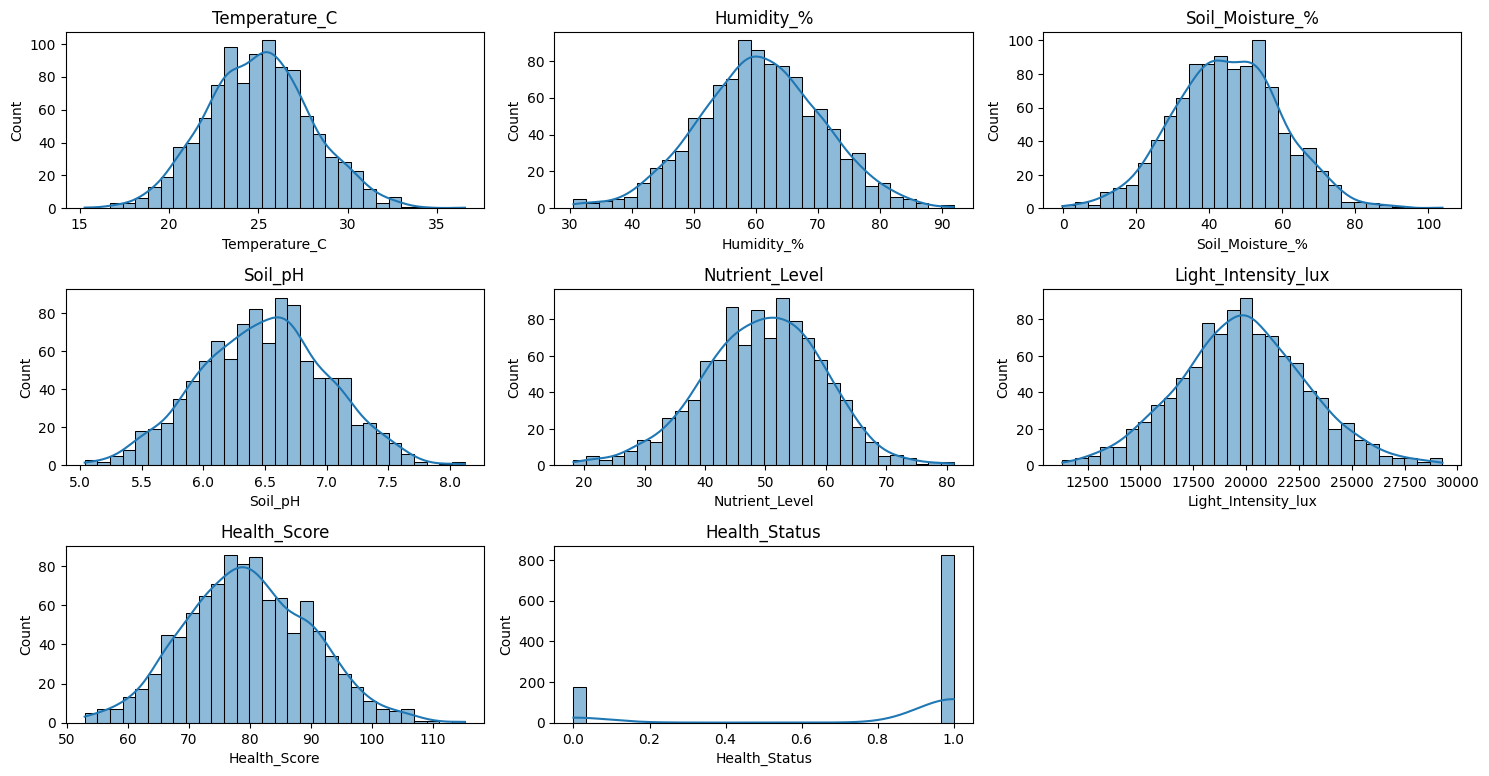

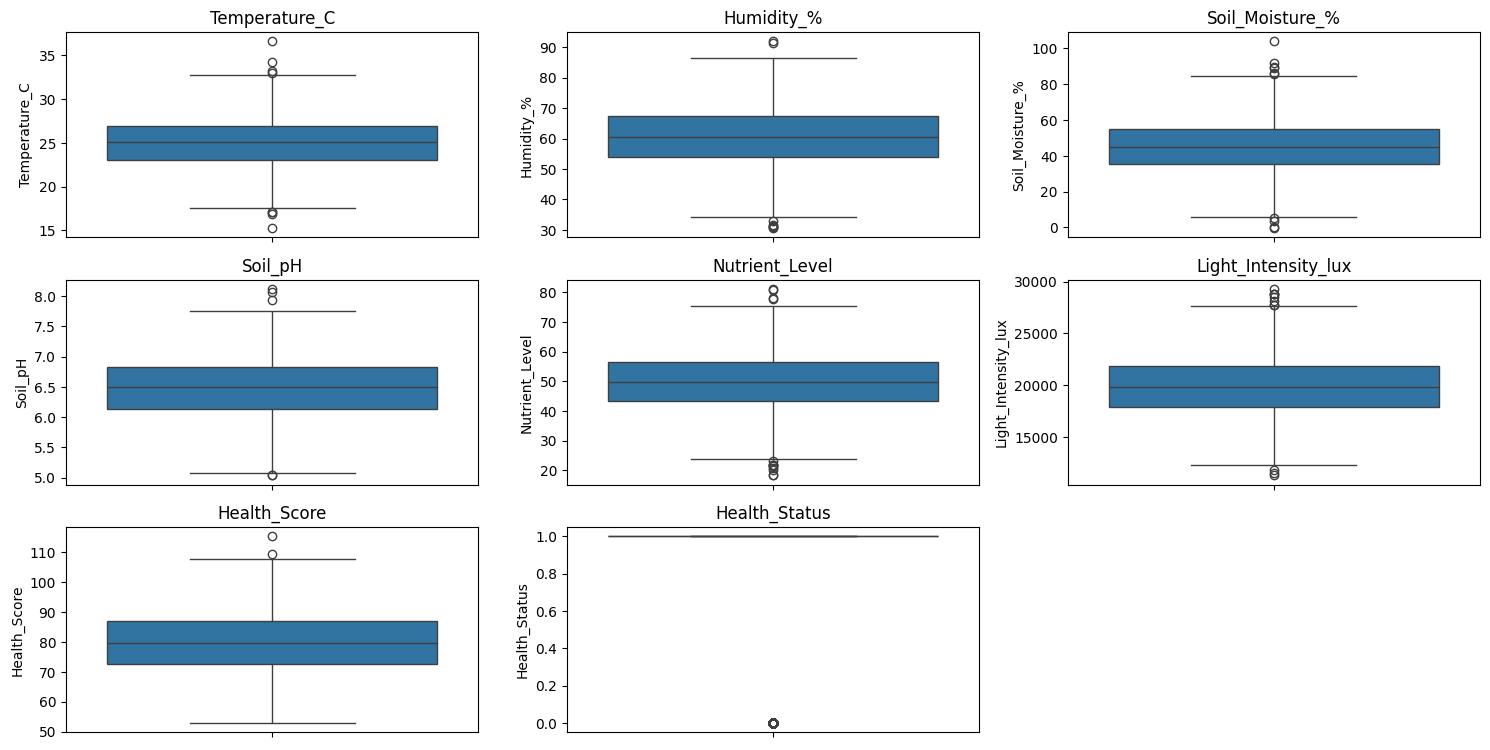

In [ ]:
#distributions des variables du fichier plant_moniter_health_data
plant_moniter.set_index(["Plant_ID"], inplace=True)

plt.figure(figsize=(15, 10))
for i, col in enumerate(plant_moniter.columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(plant_moniter[col].dropna(), kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(plant_moniter.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=plant_moniter[col])
    plt.title(col)

plt.tight_layout()
plt.show()